## Introduction
EnergiX Enterprise is currently facing significant challenges within the dynamic energy market. These challenges include fluctuations in energy demand and supply, rising competition from renewable energy providers, evolving regulatory requirements, and limitations due to aging infrastructure and outdated technology. These factors collectively impact the company's operations, profitability, and ability to adapt to market dynamics.

To address these challenges, the analysis in this project will uncover insights and identify strategic solutions. This project aims to provide actionable insights and recommendations to help EnergiX enhance its energy production efficiency, stabilize pricing, comply with regulations, and effectively compete in the renewable energy market.

In [14]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#import data from csv
url = r"C:\Users\user.DESKTOP-1OSCPEL\Documents\Energy_Market_Resilience_Analysis\historical_energy_data.csv"
historical_data = pd.read_csv(url)
url1= r"C:\Users\user.DESKTOP-1OSCPEL\Documents\Energy_Market_Resilience_Analysis\regulatory_data.csv"
regulatory_data = pd.read_csv(url1)
url2 = r"C:\Users\user.DESKTOP-1OSCPEL\Documents\Energy_Market_Resilience_Analysis\infrastructure_data.csv"
infrastructure_data = pd.read_csv(url2)
url3 = r"C:\Users\user.DESKTOP-1OSCPEL\Documents\Energy_Market_Resilience_Analysis\market_data.csv"
market_data = pd.read_csv(url3)

In [60]:
historical_data.head()
historical_data.info()

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh),Year,Month,Year-Month
0,2012-01-01,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604,2012,1,2012-01
1,2012-01-02,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734,2012,1,2012-01
2,2012-01-03,Region A,Renewables,81268,36244,0.155890,4418.260676,31523,2012,1,2012-01
3,2012-01-04,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205,2012,1,2012-01
4,2012-01-05,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548,2012,1,2012-01


In [59]:
market_data.head()
market_data.info()

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518
1,2012-01-02,0.151762,Medium,Upward,2115
2,2012-01-03,0.241443,High,Stable,22353
3,2012-01-04,0.071104,Low,Downward,25482
4,2012-01-05,0.107281,High,Stable,20264


In [19]:
infrastructure_data.head()
infrastructure_data.info()

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,01/01/2012,Poor,Repairs,High
1,02/01/2012,Poor,Upgrades,High
2,03/01/2012,Fair,Upgrades,High
3,04/01/2012,Poor,Repairs,High
4,05/01/2012,Poor,Repairs,High


In [7]:
regulatory_data.head()
regulatory_data.info()

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,2012-01-01,New Regulation,Compliant,3281.685306
1,2012-01-02,Amendment,Non-compliant,2037.272281
2,2012-01-03,Amendment,Non-compliant,629.891778
3,2012-01-04,New Regulation,Non-compliant,2277.898351
4,2012-01-05,Amendment,Non-compliant,4687.163688


The 4 datasets are relatively clean, with no missing values and duplicates. The Date/Time column will be converted to datetime format in the following section.

#### Data Cleaning

In [22]:
#Convert Date/Time columns to datetime format
date_format = "%d/%m/%Y"
new_format = "%Y-%m-%d"
historical_data["Date/Time"] = pd.to_datetime(historical_data["Date/Time"], format = date_format)
historical_data["Date/Time"] = pd.to_datetime(historical_data["Date/Time"], format = new_format)

In [87]:
#Regulatory data
date_format = "%d/%m/%Y"
new_format = "%Y-%m-%d"
regulatory_data["Date/Time"] = pd.to_datetime(regulatory_data["Date/Time"], format = new_format)

In [21]:
#Infrastructure data
date_format = "%d/%m/%Y"
new_format = "%Y-%m-%d"
infrastructure_data["Date/Time"] = pd.to_datetime(infrastructure_data["Date/Time"], format = date_format)
infrastructure_data["Date/Time"] = pd.to_datetime(infrastructure_data["Date/Time"], format = new_format)

In [56]:
#Market Data
date_format = "%d/%m/%Y"
new_format = "%Y-%m-%d"
market_data["Date/Time"] = pd.to_datetime(market_data["Date/Time"], format = date_format)
market_data["Date/Time"] = pd.to_datetime(market_data["Date/Time"], format = new_format)

#### Exploratory Data Analysis

In [26]:
#Group all datasets as dataset
datasets = { "historical_data":historical_data,
            "infrastructure_data":infrastructure_data,
            "regulatory_data": regulatory_data,
            "market_data": market_data
}
#Extract all categorical columns for each dataset as a dictionary
categorical_columns = { "historical_data":["Location/Region", "Energy Source"],
            "infrastructure_data":["Infrastructure Status", "Maintenance Activities", "Technology Limitations"],
            "regulatory_data": ["Regulatory Changes", "Compliance Status"],
            "market_data": ["Competitor Data", "Market Trends"]
}

#Extract counts for each unique value in the columns
categorical_values_counts = {}
for dataset, columns in categorical_columns.items():
    for column in columns:
        categorical_values_counts[(dataset, column)] = datasets[dataset][column].value_counts()
        


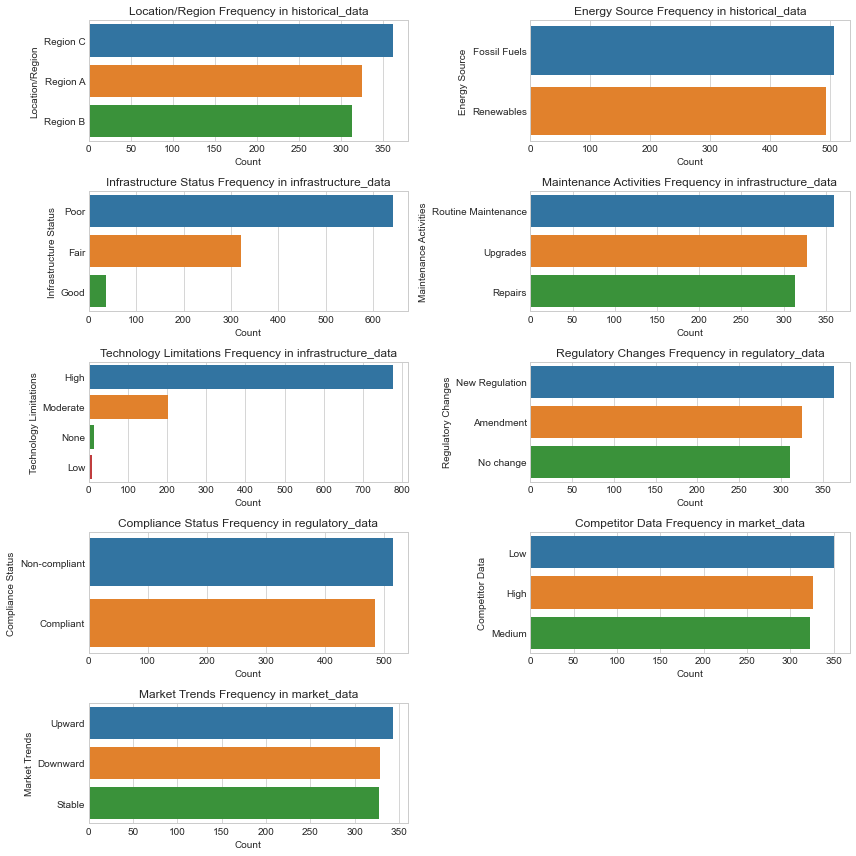

In [114]:
# Visualisation
num_rows = (len(categorical_values_counts) + 1)//2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize = (12,12))
axes = axes.flatten()
#iterate through categorical columns and plot for each 
for i, ((dataset, column), counts) in enumerate(categorical_values_counts.items()):
    ax = axes[i]
    sns.barplot(x=counts.values, y=counts.index, ax=ax)
    ax.set_title(f"{column} Frequency in {dataset}")
    ax.set_xlabel("Count")
    ax.set_ylabel(column)
    
for i in range(len(categorical_values_counts),num_rows*num_cols):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

#### Energy Demand, Production and Consumption over Time

In [34]:
#Extract Year and Month from Date/Time column in historical data
historical_data["Year"] = historical_data["Date/Time"].dt.year
historical_data["Month"] = historical_data["Date/Time"].dt.month
#Create new column Year-Month
historical_data["Year-Month"] = historical_data["Date/Time"].dt.to_period('M')

#Aggregate data on Monthly basis
monthly_data = historical_data.groupby("Year-Month").mean()

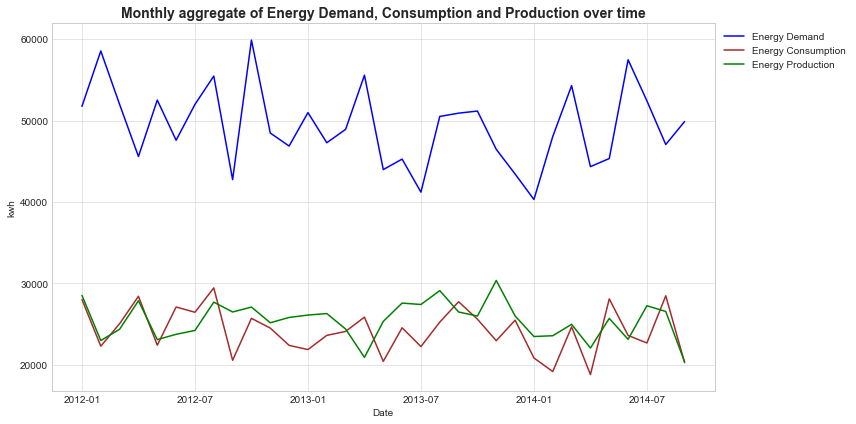

In [112]:
# Plot demand, production and consumption
plt.figure(figsize = (12,6))
sns.lineplot(data = monthly_data, x = monthly_data.index.astype(str), y = "Energy Demand", label = "Energy Demand", color="blue",ci=None)
sns.lineplot(data = monthly_data, x = monthly_data.index.astype(str), y = "Energy Consumption (kWh)", label = "Energy Consumption", color="brown",ci=None)
sns.lineplot(data = monthly_data, x = monthly_data.index.astype(str), y = "Energy Production (kWh)", label = "Energy Production", color="green",ci=None)
plt.title("Monthly aggregate of Energy Demand, Consumption and Production over time",  fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("kwh")
labels = monthly_data.index.astype(str).tolist()
n=6
plt.xticks(labels[::n],rotation = 360)
plt.legend(loc='upper left', bbox_to_anchor=[1,1])
plt.grid(True, which='both',linewidth=0.5)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

It appears that across the years, energy **demand** has exceeded *both* energy production and consumption. The company is unable to meet the market demand for energy. As energy is being produced, it is being consumed , i.e. the enery production is directly proportional to consumption. Investigate why they are unable to produce sufficient energy to meet the current market demand. 

**Market Price vs Energy Price**

Investigate current pring dynamics in relation to market trends

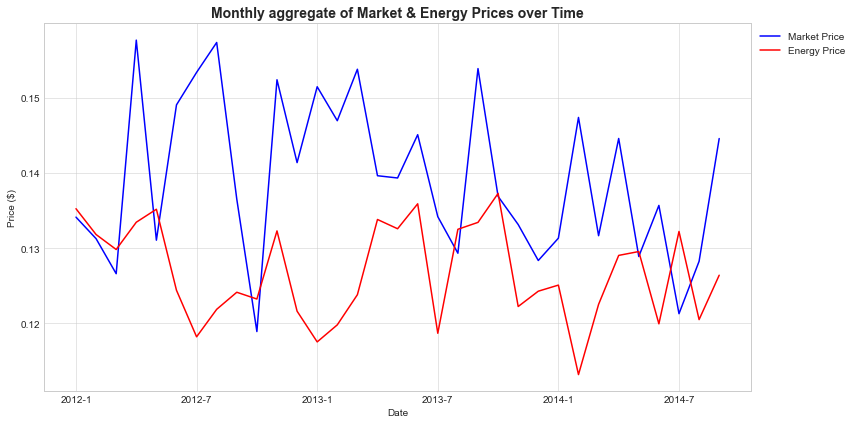

In [113]:
# Merge historical_data and market_data
merged_market_data = pd.merge(historical_data, market_data, on="Date/Time", how="inner")
merged_market_data["Year"] = merged_market_data["Date/Time"].dt.year
merged_market_data["Month"] = merged_market_data["Date/Time"].dt.month
# Aggregate Data on a monthly basis
monthly_market_data = merged_market_data.groupby(['Year','Month']).mean()
monthly_market_data["Year-Month"] = monthly_market_data.index.get_level_values(0).astype(str)+'-'+monthly_market_data.index.get_level_values(1).astype(str)
#Plot Energy Price vs Market Price
plt.figure(figsize = (12,6))
sns.lineplot(data = monthly_market_data, x="Year-Month", y='Market Price',label='Market Price', color = 'blue', ci=None)
sns.lineplot(data = monthly_market_data, x="Year-Month", y='Energy Price',label='Energy Price', color = 'red', ci=None)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Monthly aggregate of Market & Energy Prices over Time', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=[1,1])
labels = monthly_market_data['Year-Month'].tolist()
n=6
plt.xticks(labels[::n],rotation = 360)
plt.grid(True, which='both',linewidth=0.5)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

Energy price is the price at which the company currently charges for its product. Overall,both prices appear to fluctuate over time which maybe due to macroeconomic factors or regulatory factors. Market price is higher than the energy price, thus an indication of a competitive market. While the current energy prices may give the company a competitive edge, it may affect the **profitablity** of the company. 

Investigate correlation between energy demand and energy price.

**Correlation - Energy Price & Demand**

In [66]:
merged_market_data = pd.merge(historical_data, market_data, on='Date/Time', how='inner')
correlation_energy_price=merged_market_data['Energy Demand'].corr(merged_market_data['Energy Price'])
correlation_market_price = merged_market_data['Market Demand'].corr(merged_market_data['Market Price'])

In [67]:
correlation_energy_price

-0.005361840768503358

In [73]:
correlation_market_price

0.02980230216283614

Energy Price and Demand correlation is -0.005, a negative relationship, thus no linear relationship between these two variables. There may be other factors that affect the price or demand of their products.

**Infrastructure Status and Technology Limitations**

Investigate the distribution  of these two categories.

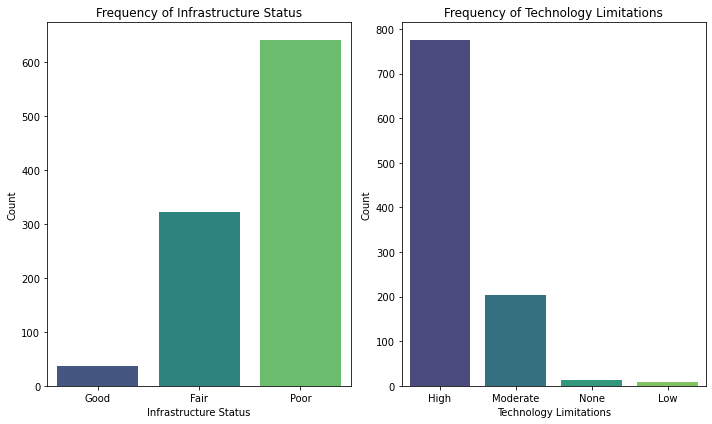

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))
#Frequency of Infrastructure Status
sns.countplot(data=infrastructure_data, x='Infrastructure Status', ax=axes[0], order=['Good', 'Fair','Poor'], palette='viridis')
axes[0].set_title('Frequency of Infrastructure Status')
axes[0].set_xlabel('Infrastructure Status')
axes[0].set_ylabel('Count')

#Frequency of Technology Limitations
sns.countplot(data=infrastructure_data, x='Technology Limitations', ax=axes[1], palette='viridis')
axes[1].set_title('Frequency of Technology Limitations')
axes[1].set_xlabel('Technology Limitations')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

The company is unable to produce sufficient energy to meet demand probably due to the poor state of their infrastructure and the high technology limitations they face during production

**Correlation - Infrastructure Status & Technology Limitations**

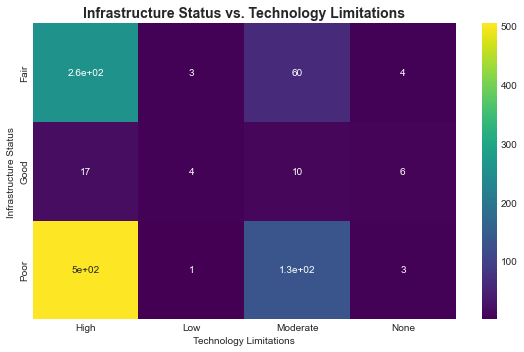

In [108]:
#Cross Tabulation of Infrastructure Status and Technology Limitations
crosstab_data = pd.crosstab(infrastructure_data['Infrastructure Status'], infrastructure_data['Technology Limitations'])
plt.figure(figsize=(8,5))
sns.heatmap(crosstab_data, annot=True, cmap='viridis')
plt.title('Infrastructure Status vs. Technology Limitations', fontsize=14, fontweight='bold')
plt.xlabel('Technology Limitations')
plt.ylabel('Infrastructure Status')
plt.tight_layout()
plt.show()

There is a high relationship between Poor Infrastructure and High technology limitations. this consolidates the idea that  their infrastructure needs an upgrade or overhaul, to upscale their production.

**Relationship between Infrastructure Status, Technology limitations and Energy demand**

In [76]:
infrastructure_data['Poor_Infrastructure'] = infrastructure_data['Infrastructure Status'].apply(lambda x:1 if x=='Poor' else 0)
infrastructure_data['High_Tech_Limitations'] = infrastructure_data['Technology Limitations'].apply(lambda x:1 if x=='High' else 0)
infrastructure_data['Combined'] = infrastructure_data['Poor_Infrastructure']* infrastructure_data['High_Tech_Limitations']
merged_data=pd.merge(historical_data, infrastructure_data,on='Date/Time', how='inner')

correlation_coefficient = merged_data['Energy Production (kWh)'].corr(merged_data['Combined'])
correlation_coefficient

-0.015877155348918308

A correlation score of -0.015, suggests there is a weak negative linear relationship between demand and these infrastructure and technology limitations. Energy Production tends to decrease as Infrastructure and Technology limitations increase.
While these constraints have a direct on production, demand is affected by other factors. This might also suggest there is a very competitive business environment in the energy sector, that may influence demand.

**Regulatory Changes and Compliance Costs**


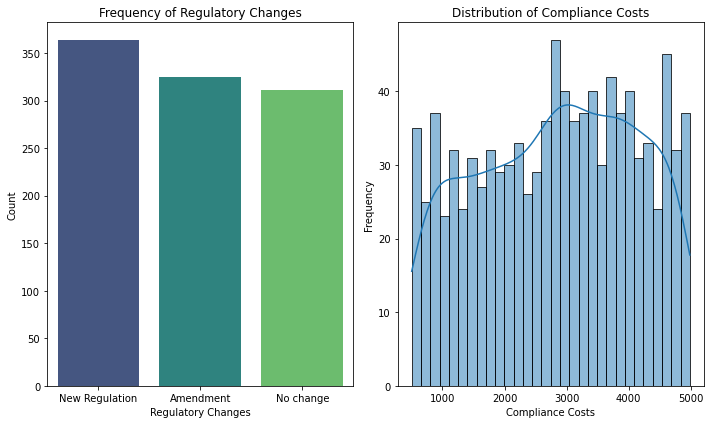

In [82]:
#Visualize frequency of regulatory costs
fig, axes = plt.subplots(1, 2, figsize=(10,6))
sns.countplot(data = regulatory_data, x='Regulatory Changes',ax=axes[0], palette='viridis' )
axes[0].set_title('Frequency of Regulatory Changes')
axes[0].set_xlabel('Regulatory Changes')
axes[0].set_ylabel('Count')
#Distribution of compliance costs
sns.histplot(data=regulatory_data,x='Compliance Costs', bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Compliance Costs')
axes[1].set_xlabel('Compliance Costs')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


Regulatory changes and amendments are frequent during this period of operations. Subsequent compliance costs are quite significant as well. Investigate how these compliance costs impact the operational costs and the revenue generated by the company as well.
#### Impact of regulatory changes and operational costs on Revenue.

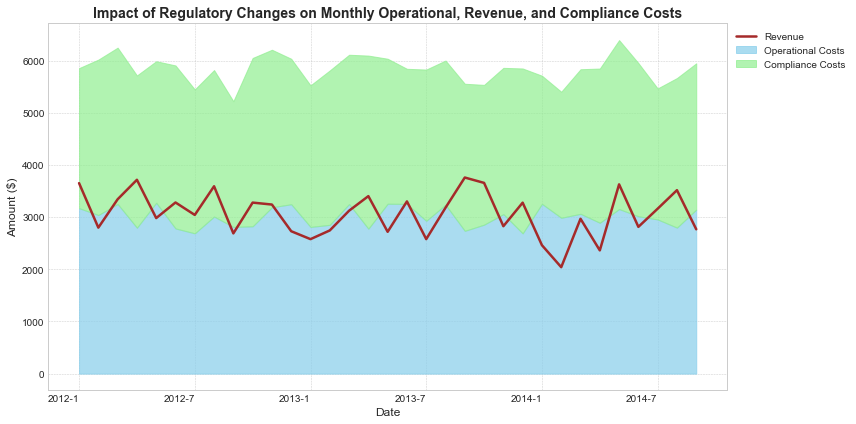

In [107]:
#Visualize relationship between regulatory changes & the asscoicated compliance costs, operational costs and revenue
# Revenue = Energy Consumption * Energy Price

historical_data['Revenue'] = historical_data['Energy Consumption (kWh)']* historical_data['Energy Price']
merged_regulatory_data = pd.merge(historical_data, regulatory_data, on='Date/Time', how='inner')

merged_regulatory_data['Year'] = merged_regulatory_data['Date/Time'].dt.year
merged_regulatory_data['Month'] = merged_regulatory_data['Date/Time'].dt.month

monthly_aggregated_data = merged_regulatory_data.groupby(['Year', 'Month']).mean().reset_index()

monthly_aggregated_data['Year-Month'] = monthly_aggregated_data['Year'].astype(str) + '-' + monthly_aggregated_data['Month'].astype(str)

# Area chart : Operational costs vs Compliance costs vs Revenue
plt.figure(figsize=(12,6))
plt.fill_between(monthly_aggregated_data['Year-Month'], monthly_aggregated_data['Operational Costs'], color='skyblue', label='Operational Costs', alpha=0.7)
plt.fill_between(monthly_aggregated_data['Year-Month'], monthly_aggregated_data['Operational Costs'], 
                 monthly_aggregated_data['Operational Costs'] + monthly_aggregated_data['Compliance Costs'], 
                 color='lightgreen', label='Compliance Costs', alpha=0.7)

sns.lineplot(data=monthly_aggregated_data, x='Year-Month', y='Revenue', label='Revenue', color='brown', linewidth=2.5)

plt.title('Impact of Regulatory Changes on Monthly Operational, Revenue, and Compliance Costs', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Format x-ticks to show every 6th month
labels = monthly_aggregated_data['Year-Month'].tolist()
n = 6
plt.xticks(labels[::n], rotation=360, ha='right')

plt.tight_layout()
plt.show()

Operational costs are the day to day costs incurred by the business. All three metrics fluctuate over time, with the costs exceeding the revenue genated by the business. This business is running at a loss and must adjust its revenue strategies to meet its expenses. They need to adjust their pricing strategies and revenue allocation strategy.
#### Competition Analysis
Analyse Energy source column, visualize trends in production based on energy source over time

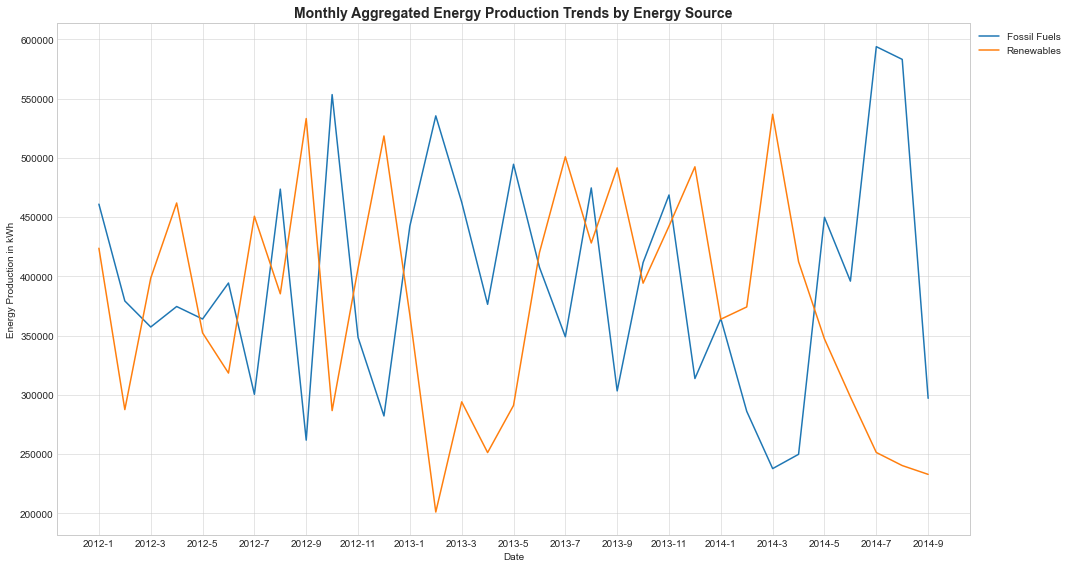

In [111]:
# Aggregate on a Monthly basis for each energy source
monthly_aggregated_data = historical_data.groupby(['Year', 'Month', 'Energy Source']).sum()['Energy Production (kWh)'].reset_index()
monthly_aggregated_data['Year-Month'] = monthly_aggregated_data['Year'].astype(str) + '-' + monthly_aggregated_data['Month'].astype(str)
plt.figure(figsize=(15,8))
sns.lineplot(data=monthly_aggregated_data, x='Year-Month', y='Energy Production (kWh)',hue='Energy Source', ci=None)
plt.title('Monthly Aggregated Energy Production Trends by Energy Source', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Energy Production in kWh')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=10)
labels=monthly_aggregated_data['Year-Month'].tolist()
n=4
plt.xticks(labels[::n], rotation=360)
plt.grid(True, which='both',linewidth=0.5)
plt.tight_layout()
plt.show()

There are fluctuations in production of both energy sources, with the renewable fuels seeing spikes in production during certain periods. In other periods the production of the renewable sources decreased indicating possible competition, that impacted their market share. Focus on renewable sources should be considered, by working on the infrastructure and technology limitations to increase production. This may boost their market share and revenue over time.

**Insights**

1. **Dynamic Energy Landscape** - EnergiX Enterprise faces considerable variations in energy production, consumption, and demand patterns. Notably, there are specific periods where demand surpasses production, underlining potential market stability and supply consistency concerns.
2. **Pricing Volatility** - EnergiX's energy pricing exhibits significant volatility within broader market price trends. The energy price remains uncorrelated with energy demand, posing challenges for sales predictability and revenue forecasting.
3. **Infrastructure & Technology Concerns** - A significant portion of the company’s infrastructure is rated as 'Poor'. Combined with severe technology limitations, this necessitates comprehensive infrastructure rejuvenation. Initial analysis indicates that areas of 'Poor' infrastructure status and high technological constraints could result in reduced energy production.
4. **Regulatory & Financial Implications** -EnergiX is currently navigating a challenging regulatory landscape, with new mandates and modifications to existing ones. These financial ramifications, particularly in terms of compliance costs and operational expenditures, are significant. A juxtaposition of these costs with the firm’s current revenue trajectory indicates a pressing profitability challenge.
5. **Emergence of Renewables**- The energy market is experiencing a substantial shift towards renewables. Data trends suggest that renewable energy production instances have exceeded those of fossil fuels. For EnergiX, this highlights the dual challenges of evolving competition and potential market share erosion. 

**Resilience Planning and Recommendations**
1. **Balanced Energy Portfolio** - EnergiX Enterprise should consider diversifying its energy production portfolio to mitigate the risks associated with fluctuations in demand and production. A balanced mix of renewable and non-renewable sources can help stabilize the energy supply and meet demand more consistently.
2. **Dynamic Pricing Model** - Given that energy price doesn’t correlate with energy demand, EnergiX should consider implementing a dynamic pricing model. This model can adjust prices based on demand, production costs, and other market factors. Such a model can help in improving sales during high-demand periods and maintaining profitability during low-demand times.
3. **Infrastructure Revamp** - With much of the company’s infrastructure in 'Poor' status and high technology limitations, EnergiX should prioritize investments in infrastructure upgrades. Modernizing infrastructure can lead to increased production efficiency, reduced downtimes, and potentially higher energy output.
4. **Regulatory Compliance Fund and Operational Cost** - Given the periodic introduction of new regulations and the associated compliance costs and operational cost, EnergiX should establish a dedicated fund or reserve to address these unforeseen expenses. This approach can hel
5. **Embrace Renewables** - The trend towards renewable energy is gaining traction. EnergiX should consider increased investments in renewable energy technologies and infrastructure. This not only aligns with global sustainability goals but also positions the company to better compete in an evolving energy market.
6. **Cost Management & Revenue Generation** - Considering the operational and compliance costs are impacting profitability, EnergiX should undertake a thorough review of its operations to identify cost-saving opportunities. Additionally, exploring alternative revenue streams, such as energy storage solutions or consultancy services, can further bolster the company’s financial position.
7. **Stakeholder Engagement** - Engage with regulatory bodies proactively to stay ahead of potential regulatory changes. This proactive approach can help in better preparation and can also influence regulations in a manner favorable to EnergiX.
8. **Market Research & Consumer Insights** - Conduct regular market research to understand consumer preferences, especially concerning renewable energy. This can guide EnergiX’s strategy in terms of energy source diversification and pricing.
In conclusion, while EnergiX faces challenges in terms of fluctuating demand, aging infrastructure, and increasing competition from renewables, there are clear strategic paths available. By modernizing infrastructure, diversifying energy sources, and adopting a dynamic pricing model, EnergiX can position itself for sustained growth and profitability in the future energy market.